In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import scipy.stats as st

# File to Load (csv location)
emission_data_csv = "Resources/historical_emissions_sectors.csv"

# Read in csv file from Resources Folder
emission_data = pd.read_csv(emission_data_csv)
emission_data.head()

,Country,Data source,Sector,Gas,Unit,2019,2018,2017,2016,2015,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,GCP,Total fossil fuels and cement,CO2,MtCO₂e,36440.76,36420.16,35694.69,35222.03,35211.04,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
1,World,GCP,Coal,CO2,MtCO₂e,14362.56,14619.36,14414.18,14362.88,14623.02,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,World,GCP,Oil,CO2,MtCO₂e,12354.11,12252.42,12175.47,11970.29,11915.33,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
3,China,GCP,Total fossil fuels and cement,CO2,MtCO₂e,10174.68,9956.57,9750.73,9552.52,9683.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
4,World,GCP,Gas,CO2,MtCO₂e,7615.71,7489.22,7115.49,6939.62,6763.74,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39


In [2]:
#delete the extra columns [Data Source, Gas, Unit]
emission_data = emission_data.drop(columns = ['Data source','Gas','Unit'])
emission_data.head()

,Country,Sector,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,Total fossil fuels and cement,36440.76,36420.16,35694.69,35222.03,35211.04,35244.02,34987.54,34760.37,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
1,World,Coal,14362.56,14619.36,14414.18,14362.88,14623.02,14945.46,14919.81,14901.49,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,World,Oil,12354.11,12252.42,12175.47,11970.29,11915.33,11743.12,11629.54,11523.28,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
3,China,Total fossil fuels and cement,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
4,World,Gas,7615.71,7489.22,7115.49,6939.62,6763.74,6591.54,6540.24,6496.27,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39


In [3]:
#Locate only the total emission
filtered_emission_total = emission_data.loc[emission_data["Sector"] == 'Total fossil fuels and cement']
filtered_emission_total = filtered_emission_total.drop(columns = ['Sector'])
filtered_emission_total

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,36440.76,36420.16,35694.69,35222.03,35211.04,35244.02,34987.54,34760.37,34210.77,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
7,European Union (27),2916.91,3054.49,3127.50,3103.52,3098.97,3044.69,3179.99,3260.93,3336.52,...,3150.78,2949.08,2777.13,2715.40,2655.79,2611.54,2500.41,2312.45,2157.63,2067.81
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Cook Islands,0.08,0.07,0.07,0.06,0.06,0.07,0.06,0.06,0.06,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,Kiribati,0.07,0.07,0.07,0.07,0.06,0.06,0.05,0.05,0.05,...,0.01,0.03,0.02,0.01,0.01,0.02,0.02,0.01,0.01,NaN
814,Nauru,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.04,0.04,...,0.07,0.05,0.05,0.03,0.03,0.03,NaN,NaN,NaN,NaN
832,Niue,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
filtered_emission_total = filtered_emission_total[filtered_emission_total.Country != "World"]
filtered_emission_total = filtered_emission_total[filtered_emission_total.Country !='European Union (27)']
filtered_emission_total

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49
11,Russia,1678.37,1691.36,1646.18,1618.30,1622.86,1622.35,1619.17,1679.87,1664.95,...,1371.48,1316.89,1280.90,1224.98,1159.99,1093.52,1028.22,958.76,913.53,885.86
16,Japan,1106.66,1135.69,1187.66,1203.17,1222.78,1263.05,1314.70,1305.43,1264.16,...,653.22,561.91,489.31,419.25,386.47,358.89,324.84,292.86,282.79,232.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Cook Islands,0.08,0.07,0.07,0.06,0.06,0.07,0.06,0.06,0.06,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,Kiribati,0.07,0.07,0.07,0.07,0.06,0.06,0.05,0.05,0.05,...,0.01,0.03,0.02,0.01,0.01,0.02,0.02,0.01,0.01,NaN
814,Nauru,0.05,0.05,0.05,0.04,0.05,0.05,0.05,0.04,0.04,...,0.07,0.05,0.05,0.03,0.03,0.03,NaN,NaN,NaN,NaN
832,Niue,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
filtered_emission_total = filtered_emission_total.dropna()
filtered_emission_total

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49
11,Russia,1678.37,1691.36,1646.18,1618.30,1622.86,1622.35,1619.17,1679.87,1664.95,...,1371.48,1316.89,1280.90,1224.98,1159.99,1093.52,1028.22,958.76,913.53,885.86
16,Japan,1106.66,1135.69,1187.66,1203.17,1222.78,1263.05,1314.70,1305.43,1264.16,...,653.22,561.91,489.31,419.25,386.47,358.89,324.84,292.86,282.79,232.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Saint Vincent and the Grenadines,0.26,0.26,0.26,0.25,0.21,0.27,0.21,0.25,0.20,...,0.03,0.02,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.01
750,Comoros,0.25,0.25,0.24,0.20,0.17,0.15,0.18,0.14,0.14,...,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01
760,Tonga,0.18,0.16,0.16,0.13,0.12,0.11,0.11,0.11,0.10,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
764,Dominica,0.16,0.17,0.16,0.18,0.18,0.18,0.17,0.16,0.15,...,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [6]:
filtered_emission_total = filtered_emission_total.set_index('Country')
# filtered_emission_total

In [7]:
# filtered_emission_total.reset_index(drop=True, inplace=True)
# filtered_emission_total

In [8]:
filtered_emission_total = filtered_emission_total.T
filtered_emission_total.head()

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
2019,10174.68,5284.70,2616.45,1678.37,1106.66,779.53,701.96,617.51,611.26,582.15,...,0.32,0.32,0.31,0.29,0.29,0.26,0.25,0.18,0.16,0.13
2018,9956.57,5424.88,2591.32,1691.36,1135.69,755.40,755.36,576.58,634.93,576.76,...,0.31,0.30,0.30,0.28,0.27,0.26,0.25,0.16,0.17,0.13
2017,9750.73,5253.61,2456.85,1646.18,1187.66,724.58,786.65,531.01,620.61,579.42,...,0.29,0.29,0.30,0.28,0.26,0.26,0.24,0.16,0.16,0.12
2016,9552.52,5292.27,2392.36,1618.30,1203.17,648.06,800.51,568.19,617.96,565.75,...,0.29,0.29,0.30,0.27,0.25,0.25,0.20,0.13,0.18,0.12
2015,9683.20,5412.43,2253.43,1622.86,1222.78,640.81,795.82,507.01,595.39,645.41,...,0.28,0.29,0.29,0.26,0.23,0.21,0.17,0.12,0.18,0.11


In [9]:
filtered_emission_total.index.name
filtered_emission_total.index.name = "Decades"
filtered_emission_total.index.name

'Decades'

In [10]:
filtered_emission_total.head()

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
Decades,,,,,,,,,,,,,,,,,,,,,
2019,10174.68,5284.70,2616.45,1678.37,1106.66,779.53,701.96,617.51,611.26,582.15,...,0.32,0.32,0.31,0.29,0.29,0.26,0.25,0.18,0.16,0.13
2018,9956.57,5424.88,2591.32,1691.36,1135.69,755.40,755.36,576.58,634.93,576.76,...,0.31,0.30,0.30,0.28,0.27,0.26,0.25,0.16,0.17,0.13
2017,9750.73,5253.61,2456.85,1646.18,1187.66,724.58,786.65,531.01,620.61,579.42,...,0.29,0.29,0.30,0.28,0.26,0.26,0.24,0.16,0.16,0.12
2016,9552.52,5292.27,2392.36,1618.30,1203.17,648.06,800.51,568.19,617.96,565.75,...,0.29,0.29,0.30,0.27,0.25,0.25,0.20,0.13,0.18,0.12
2015,9683.20,5412.43,2253.43,1622.86,1222.78,640.81,795.82,507.01,595.39,645.41,...,0.28,0.29,0.29,0.26,0.23,0.21,0.17,0.12,0.18,0.11


In [11]:
filtered_emission_total.index = pd.to_datetime(filtered_emission_total.index)
type(filtered_emission_total.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
# filtered_emission_total.set_index("Years")

filtered_emission_total=filtered_emission_total.resample('10AS').sum()

In [13]:
filtered_emission_total

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
Decades,,,,,,,,,,,,,,,,,,,,,
1960-01-01,5112.61,33608.45,1472.42,11234.13,4002.04,551.19,9330.92,249.00,257.27,126.94,...,0.51,0.23,1.02,0.28,0.25,0.16,0.14,0.10,0.13,0.10
1970-01-01,11103.65,46111.01,2281.89,17794.55,8808.81,1357.87,10596.09,605.61,848.57,924.85,...,0.94,0.65,1.44,0.48,0.58,0.33,0.31,0.29,0.30,0.20
1980-01-01,18859.98,45839.88,3962.21,22521.42,9321.44,1501.07,10370.94,1150.43,1744.39,1791.90,...,1.72,1.42,1.75,0.69,1.09,0.61,0.49,0.52,0.46,0.48
1990-01-01,30070.05,54401.25,7524.23,17992.29,12092.77,2659.15,9576.75,2199.38,3422.96,2500.73,...,1.81,1.86,2.30,1.44,1.18,1.17,0.75,0.90,0.70,0.50
2000-01-01,54280.75,59673.69,12056.71,15453.35,12618.98,4580.50,8744.49,3458.50,4729.49,3751.53,...,1.96,2.73,2.46,2.21,1.60,2.14,1.21,1.12,1.35,0.71
2010-01-01,96257.23,54374.56,21914.11,16456.29,12217.37,6542.76,7920.29,5090.93,5996.23,5670.76,...,2.76,3.21,2.91,2.69,2.30,2.39,1.88,1.30,1.68,1.14


In [14]:
filtered_emission_total["Years"] = ['1960s','1970s','1980s','1990s','2000s','2010s']
filtered_emission_total = filtered_emission_total.set_index('Years',drop=True)
filtered_emission_total

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
Years,,,,,,,,,,,,,,,,,,,,,
1960s,5112.61,33608.45,1472.42,11234.13,4002.04,551.19,9330.92,249.00,257.27,126.94,...,0.51,0.23,1.02,0.28,0.25,0.16,0.14,0.10,0.13,0.10
1970s,11103.65,46111.01,2281.89,17794.55,8808.81,1357.87,10596.09,605.61,848.57,924.85,...,0.94,0.65,1.44,0.48,0.58,0.33,0.31,0.29,0.30,0.20
1980s,18859.98,45839.88,3962.21,22521.42,9321.44,1501.07,10370.94,1150.43,1744.39,1791.90,...,1.72,1.42,1.75,0.69,1.09,0.61,0.49,0.52,0.46,0.48
1990s,30070.05,54401.25,7524.23,17992.29,12092.77,2659.15,9576.75,2199.38,3422.96,2500.73,...,1.81,1.86,2.30,1.44,1.18,1.17,0.75,0.90,0.70,0.50
2000s,54280.75,59673.69,12056.71,15453.35,12618.98,4580.50,8744.49,3458.50,4729.49,3751.53,...,1.96,2.73,2.46,2.21,1.60,2.14,1.21,1.12,1.35,0.71
2010s,96257.23,54374.56,21914.11,16456.29,12217.37,6542.76,7920.29,5090.93,5996.23,5670.76,...,2.76,3.21,2.91,2.69,2.30,2.39,1.88,1.30,1.68,1.14


In [15]:
new_filtered_emission = filtered_emission_total.T

pd.set_option("display.max_rows", None)

new_filtered_emission

Years,1960s,1970s,1980s,1990s,2000s,2010s
Country,,,,,,
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56
India,1472.42,2281.89,3962.21,7524.23,12056.71,21914.11
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37
Iran,551.19,1357.87,1501.07,2659.15,4580.50,6542.76
Germany,9330.92,10596.09,10370.94,9576.75,8744.49,7920.29
Indonesia,249.00,605.61,1150.43,2199.38,3458.50,5090.93
South Korea,257.27,848.57,1744.39,3422.96,4729.49,5996.23


In [16]:
#get the total 60 year emission for every country
new_filtered_emission['60 Year Total'] = new_filtered_emission.sum(axis=1)

new_filtered_emission

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23,215684.27
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56,294008.84
India,1472.42,2281.89,3962.21,7524.23,12056.71,21914.11,49211.57
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29,101452.03
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37,59061.41
Iran,551.19,1357.87,1501.07,2659.15,4580.50,6542.76,17192.54
Germany,9330.92,10596.09,10370.94,9576.75,8744.49,7920.29,56539.48
Indonesia,249.00,605.61,1150.43,2199.38,3458.50,5090.93,12753.85
South Korea,257.27,848.57,1744.39,3422.96,4729.49,5996.23,16998.91


In [17]:
lowest_emitters = new_filtered_emission.sort_values(by=['60 Year Total'])
highest_emitters = new_filtered_emission.sort_values(by=['60 Year Total'],ascending=False)

In [18]:
lowest_emitters = lowest_emitters.iloc[:5]
highest_emitters = highest_emitters.iloc[:5]

In [19]:
lowest_emitters

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
Sao Tome and Principe,0.10,0.20,0.48,0.50,0.71,1.14,3.13
Tonga,0.10,0.29,0.52,0.90,1.12,1.30,4.23
Dominica,0.13,0.30,0.46,0.70,1.35,1.68,4.62
Comoros,0.14,0.31,0.49,0.75,1.21,1.88,4.78
Saint Vincent and the Grenadines,0.16,0.33,0.61,1.17,2.14,2.39,6.80


In [20]:
highest_emitters

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56,294008.84
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23,215684.27
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29,101452.03
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37,59061.41
Germany,9330.92,10596.09,10370.94,9576.75,8744.49,7920.29,56539.48


Text(0.5, 0, 'Countries')

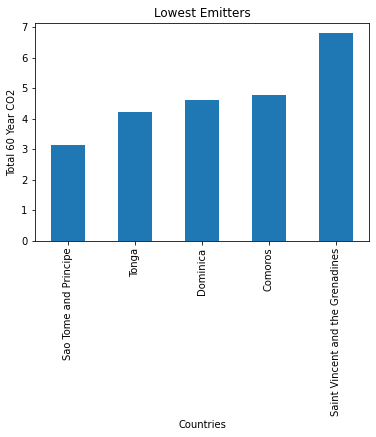

In [21]:
low_bar = lowest_emitters["60 Year Total"].plot.bar(title = "Lowest Emitting Countries Over 60 Years")
plt.ylabel("Total 60 Year CO2")
plt.xlabel("Countries")

Text(0.5, 0, 'Countries')

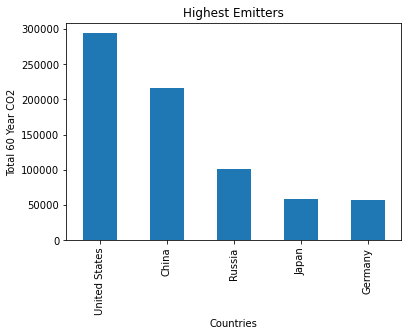

In [22]:
high_bar = highest_emitters["60 Year Total"].plot.bar(title = "Highest Emitting Countries Over 60 Years")
plt.ylabel("Total 60 Year CO2")
plt.xlabel("Countries")

In [23]:
highest_emitters

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56,294008.84
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23,215684.27
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29,101452.03
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37,59061.41
Germany,9330.92,10596.09,10370.94,9576.75,8744.49,7920.29,56539.48


[33608.45, 46111.01, 45839.880000000005, 54401.25, 59673.69, 54374.56]
[5112.610000000001, 11103.65, 18859.98, 30070.05, 54280.75, 96257.23000000001]
[11234.130000000001, 17794.55, 22521.42, 17992.29, 15453.35, 16456.29]
[4002.04, 8808.81, 9321.44, 12092.77, 12618.98, 12217.37]
[9330.92, 10596.09, 10370.94, 9576.75, 8744.49, 7920.29]
['y=437.37x+-819180.59', 'y=1704.18x+-3346858.26', 'y=41.59x+-65656.38', 'y=157.94x+-303664.44', 'y=-38.29x+85432.53']
['United States', 'China', 'Russia', 'Japan', 'Germany']


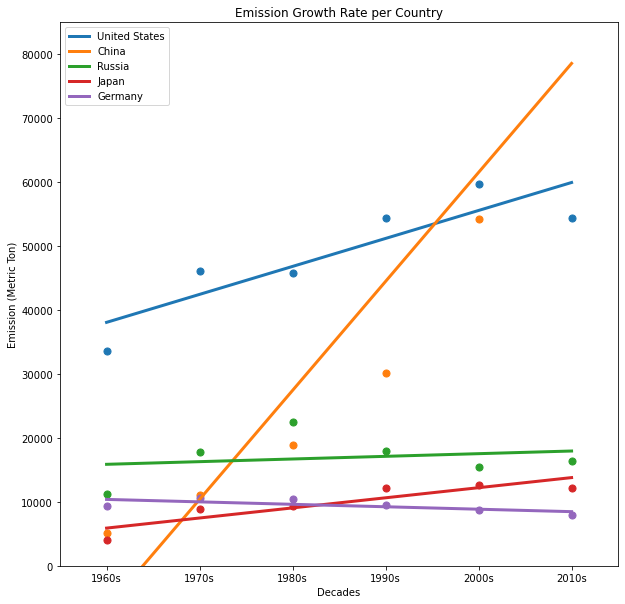

In [64]:
#scatter for highest emitting countries
years_list = [1960,1970,1980,1990,2000,2010]
year_str = ['1960s','1970s','1980s','1990s','2000s','2010s']
eqn = []
country_names = ['United States','China','Russia','Japan','Germany']

years = pd.DataFrame(years_list)
years = years.rename(columns={0:'Years'})

for country in range(0,5):
    country_data = []
    
    for count in year_str:
        country_data.append(highest_emitters[count][country])
    print(country_data)
    plt.scatter(years,country_data, s=50)

    #linear regression equation
    slope, intercept, r_value, p_value, std_err = st.linregress(years['Years'], country_data)
    eqn.append(f'y={round(slope,2)}x+{round(intercept,2)}')
    
    #Line of linear regression plot
    lin_reg = slope*years['Years'] + intercept
    plt.plot(years['Years'],lin_reg, lw = 3)  


    

plt.legend(country_names)
plt.xlabel("Decades")
plt.ylabel("Emission (Metric Ton)")
plt.title("Emission Growth Rate per Country")
plt.xlim(1955,2015)
plt.ylim(0,85000)

plt.xticks(years_list,year_str)
    

    
print(eqn)
print(country_names)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

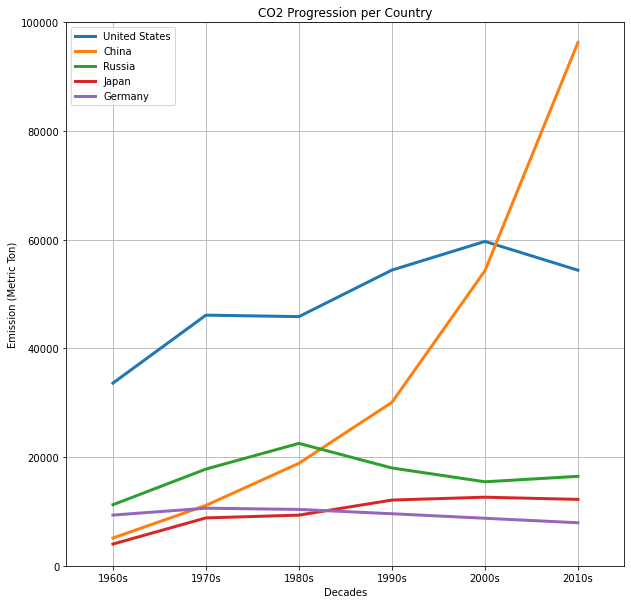

In [69]:
for country in range(0,5):
    country_data = []
    
    for count in year_str:
        country_data.append(highest_emitters[count][country])
    
    
    plt.plot(years, country_data, lw = 3)
    plt.legend(country_names)
        
    plt.xlim(1955,2015)
    plt.ylim(0,85000)
    plt.grid()

plt.legend(country_names)
plt.xlabel("Decades")
plt.ylabel("Emission (Metric Ton)")
plt.title("CO2 Progression per Country")
plt.xlim(1955,2015)
plt.ylim(0,100000)

plt.xticks(years_list,year_str)

plt.show()

In [25]:
# china_emission = new_filtered_emission.loc["China"]
# china_emission

In [26]:
# us_emission = new_filtered_emission.loc["United States"]
# us_emission

In [27]:
# # china_emission.plot.line(marker = "8", markerfacecolor='blue', markersize=12)

# plt.xlabel("Decades")
# plt.ylabel("MtCO₂e")
# plt.title("China & U.S. Emission")

# plt.rcParams["figure.figsize"] = (20,15)

# plt.plot(china_emission,marker = "8", markerfacecolor='blue', markersize=12)

# plt.plot(us_emission,marker = "s", markerfacecolor='red', markersize=12)

In [28]:
# filtered_emission_total = filtered_emission_total.set_index('Country')
# filtered_emission_total

In [29]:
# filtered_emission_total = filtered_emission_total.drop(['World','European Union (27)'])
# filtered_emission_total

In [30]:
# column_names = list(filtered_emission_total.columns.values)
# column_names

In [31]:
# emission_transposed.index = pd.to_datetime(emission_transposed.index)
# type(emission_transposed.index)

In [32]:
# period_length = 10
# start_year = 2019
# end_year = 1960
# emission_transposed = emission_transposed[(emission_transposed['Years'] >= 1960) & (emission_transposed['Years'] <= 2019)]

In [33]:
# bins = [1960,1969,1979,1989,1999,2009,2019]
# decade_name = ['1960s','1970s','1980s','1990s','2000s','2010s']

# emission_transposed = emission_transposed.reset_index()
# print(emission_transposed)

# # emission_transposed = emission_transposed.astype({'index': 'float64'}).dtypes

# china = pd.cut(emission_transposed["index"],bins, decade_name)
# china

# #bins = [1960,1969,1970,1979,1980,1989,1990,1999,2000,2009,2010,2019]

In [34]:
# sum_emission_dummy = []
# sum_emission = []  #{"China":[sum decade1,sum decade2]}
# year_index = 0

In [35]:
# #outer loop to iterate the years (incremented by 10)
# for year in range(2019,1960,-10):
#     #inner loop to iterate each row (country)
#     for row in filtered_emission_total.iterrows():
#         #third loop to iterate through the decade
#         for decade in range(year_index,year_index+10):     
#                                         #a dummy df with 10 numbers for each row (country)
#                                         #locate where column name >= year AND column name < year+10
#                                             #(row[f'{decade}'] >= year) & (row[f'{decade}'] < (year+10))
#             sum_emission_dummy.append(row[1][decade])
            
#         #sum the dummy df to get a decade sum for each row (country)    
#         sum_dummy_df = pd.DataFrame(sum_emission_dummy)
#         sum_emission_dummy = []

#         row_group_sum = sum_dummy_df.sum()
        
#         #input the sum for the row (country) per decade
#         sum_emission.append(row_group_sum)

#     #increment index by 10 to get columns for next decade
#     year_index += 10
    
# sum_emission

In [36]:
print('hello')

hello
